# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

## FITS Headers
The headers of the FITS files contain the exposure times of the flat images. Now we use `fits.open` instead of `fits.getdata`. HDU stands for Header/Data Unit.

In [2]:
hdu = fits.open('ccd_fits/480_2018-flat-16000.Light.90S0X1.R.217.fits')
header = hdu[0].header
print(header['exptime'])

90.0


## Calculating Mean Counts
We can find all of the flat images, assuming they all have 'Flat' in the name.
#### You will need to change the path to the directory containing your data.

In [3]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('ccd_fits/linearity/480*.fits')
print(flat_list)

['ccd_fits/linearity\\480_2018-flat-16000.Light.0S0X1.R.233.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.90S0X1.R.217.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.81S0X1.R.218.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.72S0X1.R.219.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.63S0X1.R.220.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.54S0X1.R.221.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.45S0X1.R.222.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.36S0X1.R.223.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.27S0X1.R.224.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.18S0X1.R.225.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.9S0X1.R.226.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.4S0X1.R.227.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.2S0X1.R.228.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.1S0X1.R.229.fits', 'ccd_fits/linearity\\480_2018-flat-16000.Light.5S0X1.R.230.fits', 

Now we can loop through each flat image, and keep track of the exposure time and mean counts

In [92]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []
maxs = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    print('Max counts: {:.2f}\n'.format(np.max(hdu[0].data)))
    means.append(mean_counts)
    maxs.append(np.max(hdu[0].data))
# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 0.12 sec
Mean counts: 1406.07

Max counts: 8189.00

Exposure time 90.0 sec
Mean counts: 58432.18

Max counts: 65535.00

Exposure time 81.0 sec
Mean counts: 58436.33

Max counts: 65535.00

Exposure time 72.0 sec
Mean counts: 58431.50

Max counts: 65535.00

Exposure time 63.0 sec
Mean counts: 58416.25

Max counts: 65535.00

Exposure time 54.0 sec
Mean counts: 58427.91

Max counts: 65535.00

Exposure time 45.0 sec
Mean counts: 58432.72

Max counts: 65535.00

Exposure time 36.0 sec
Mean counts: 58422.42

Max counts: 65535.00

Exposure time 27.0 sec
Mean counts: 58088.22

Max counts: 65535.00

Exposure time 18.0 sec
Mean counts: 55779.22

Max counts: 56897.00

Exposure time 9.0 sec
Mean counts: 30168.62

Max counts: 52539.00

Exposure time 4.5 sec
Mean counts: 15845.79

Max counts: 49886.00

Exposure time 2.25 sec
Mean counts: 8388.56

Max counts: 29659.00

Exposure time 1.125 sec
Mean counts: 4740.03

Max counts: 17261.00

Exposure time 5.625 sec
Mean counts: 19154.28

Max co

## Plot mean counts versus exposure time


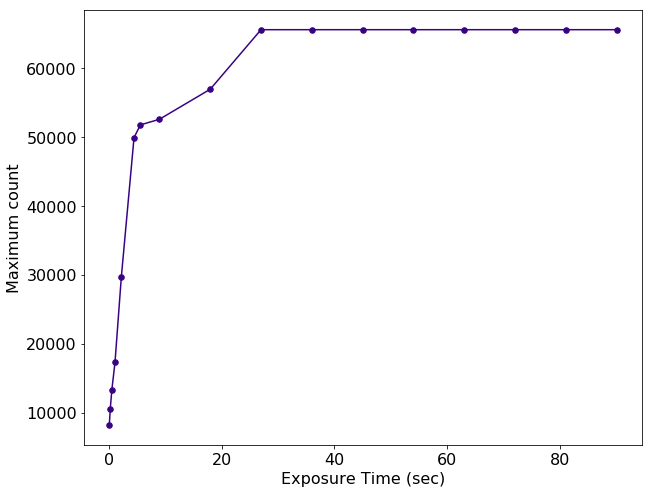

In [115]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16
maxs = [65535,
 65535,
 65535,
 65535,
 65535,
 65535,
 65535,
 65535,
 56897,
 52539,
        51725,
 49886,
 29659,
 17261,

 13247,
 10444,8189]
plt.plot(exp_times[::-1],maxs,'-w.', markersize=11,color='xkcd:indigo')
#plt.gca().set_facecolor('black')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Maximum count')
plt.show()

In [113]:
exp_times[::-1]

array([90.   , 81.   , 72.   , 63.   , 54.   , 45.   , 36.   , 27.   ,
       18.   ,  9.   ,  5.625,  4.5  ,  2.25 ,  1.125,  0.563,  0.281,
        0.12 ])